Q.1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

To multiply two matrices, the number of columns in the first matrix must equal the number of rows in the second matrix. In this case, both matrices have dimensions that satisfy this condition (k columns in the first matrix and k rows in the second matrix).   

The resulting product matrix will have dimensions (n, m).

Number of Multiplications:

To compute each element in the resulting (n, m) matrix, we need to perform k multiplications. There are a total of n * m elements in the product matrix. Therefore, the total number of multiplications is:

n * m * k
Number of Additions:

For each element in the product matrix, we need to perform k-1 additions to sum up the products. So, for all n * m elements, the total number of additions is:

n * m * (k-1)

Q.2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [7]:
import time
import numpy as np

# Define the matrices
n, k, m = 100, 200, 400
A_list = [[i*j for j in range(k)] for i in range(n)]
B_list = [[i*j for j in range(m)] for i in range(k)]

A_numpy = np.array(A_list)
B_numpy = np.array(B_list)

# Matrix multiplication using list of lists
def matmul_list(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

# Matrix multiplication using numpy
def matmul_numpy(A, B):
    return np.matmul(A, B)

# Time the list of lists solution
start_time = time.time()
C_list = matmul_list(A_list, B_list)
end_time = time.time()
list_time = end_time - start_time

# Time the numpy solution
start_time = time.time()
C_numpy = matmul_numpy(A_numpy, B_numpy)
end_time = time.time()
numpy_time = end_time - start_time

print(f"List of lists time: {list_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")

List of lists time: 2.268830 seconds
NumPy time: 0.015636 seconds


Answer :
NumPy is significantly faster than using lists of lists for matrix multiplication.
This is because NumPy is optimized for numerical operations and utilizes efficient algorithms and data structures.
List-based implementations often involve more Python interpreter overhead and slower memory access patterns.

Q4) What is the gradient of the following function with respect to x and y? x^2y + y^3 sin(x)

In [ ]:
Partial derivative with respect to x:
∂f/∂x = 2xy + y^3 * cos(x)

Partial derivative with respect to y:
∂f/∂y = x^2 + 3y^2 * sin(x)


Therefore, the gradient of the function is:

∇f = (2xy + y^3 * cos(x), x^2 + 3y^2 * sin(x))

Q.5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [9]:
import jax
import jax.numpy as jnp
from jax import grad
def f(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

grad_f_jax = grad(f)
print(grad_f_jax)

<function f at 0x0000019936034540>


Q.6) Use sympy to confirm that you obtain the same gradient analytically.

In [10]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Calculate the gradient
grad_f = sp.Matrix([f]).jacobian([x, y])

print(grad_f)


Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


Q.7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks

In [14]:
student_data = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 202251,
                "Name": "Ram",
                "Marks": {
                    "Maths": 90,
                    "English": 70,
                    # ... other subjects
                }
            }
        ],
        
        "Branch 2": [
             {
                "Roll Number": 202225,
                "Name": "Sham",
                "Marks": {
                    "Physics": 100,
                    "Chemistry": 100,
                    # ... other subjects
                }
            }
            # ... students for Branch 2
        ]
    },
    2023: {
        "Branch 1": [
             {
                "Roll Number": 202351,
                "Name": "Ram",
                "Marks": {
                    "Maths": 80,
                    "English": 90,
                    # ... other subjects
                }
            }
            # ... students for Branch 1
        ],
        "Branch 2": [
             {
                "Roll Number": 202325,
                "Name": "Sham",
                "Marks": {
                    "Physics": 100,
                    "Chemistry": 100,
                    # ... other subjects
                }
            }
            # ... students for Branch 2
            # ... students for Branch 2
        ]
    },
    2024: {
        "Branch 1": [
             {
                "Roll Number": 202451,
                "Name": "Ram",
                "Marks": {
                    "Maths": 100,
                    "English": 65,
                    # ... other subjects
                }
            }
           
            
            # ... students for Branch 1
        ],
        "Branch 2": [
             {
                "Roll Number": 202425,
                "Name": "Sham",
                "Marks": {
                    "Physics": 90,
                    "Chemistry": 99,
                    # ... other subjects
                }
            }
           
            # ... students for Branch 2
        ]
    },
    2025: {
        "Branch 1": [
             {
                "Roll Number": 202551,
                "Name": "Ram",
                "Marks": {
                    "Maths": 99,
                    "English": 70,
                    # ... other subjects
                }
            }
            # ... students for Branch 1
        ],
        "Branch 2": [
             {
                "Roll Number": 202525,
                "Name": "Sham",
                "Marks": {
                    "Physics": 100,
                    "Chemistry": 90,
                    # ... other subjects
                }
            }
           
            # ... students for Branch 2
        ]
    }
}


2022


Q.8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [15]:
students = []

def add_student(name, roll_number, marks):
  """Adds a student to the list of students."""
  student = {
    'name': name,
    'roll_number': roll_number,
    'marks': marks
  }
  students.append(student)

def search_student(roll_number):
  """Searches for a student by roll number."""
  for student in students:
    if student['roll_number'] == roll_number:
      return student
  return None

def display_students():
  """Displays all students."""
  for student in students:
    print(f"Name: {student['name']}, Roll Number: {student['roll_number']}, Marks: {student['marks']}")

# Example usage
add_student("Alice", 1, {'Math': 90, 'Science': 85, 'English': 92})
add_student("Bob", 2, {'Math': 88, 'Science': 91, 'English': 89})

student = search_student(1)
if student:
  print(f"Student found: {student}")
else:
  print("Student not found")

display_students()


Student found: {'name': 'Alice', 'roll_number': 1, 'marks': {'Math': 90, 'Science': 85, 'English': 92}}
Name: Alice, Roll Number: 1, Marks: {'Math': 90, 'Science': 85, 'English': 92}
Name: Bob, Roll Number: 2, Marks: {'Math': 88, 'Science': 91, 'English': 89}


Q.9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1) y = x

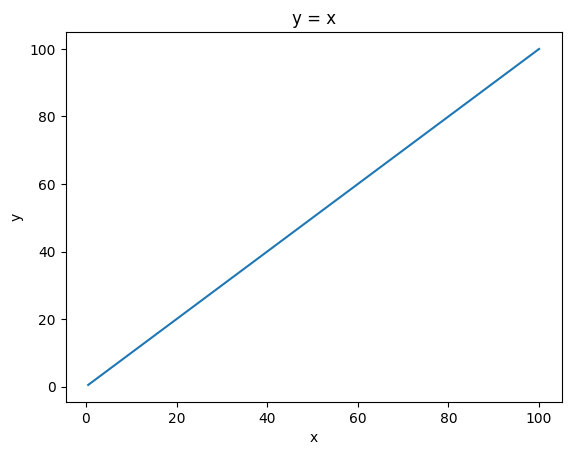

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Calculate y values as x
y = x

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x')

# Show the plot
plt.show()


2) y=x^2

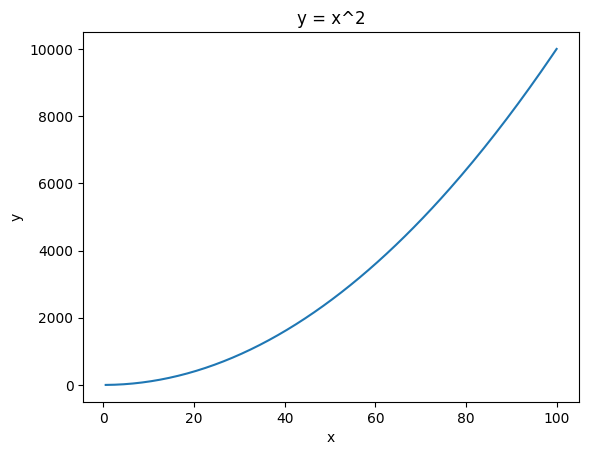

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Calculate y values as x^2
y = x**2

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')

# Show the plot
plt.show()


3) x^3/100

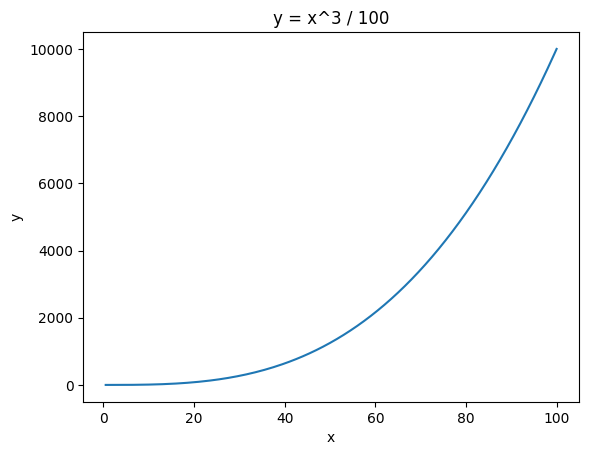

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Calculate y values as x^3 / 100
y = x**3 / 100

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^3 / 100')

# Show the plot
plt.show()


4) y = sin(x)

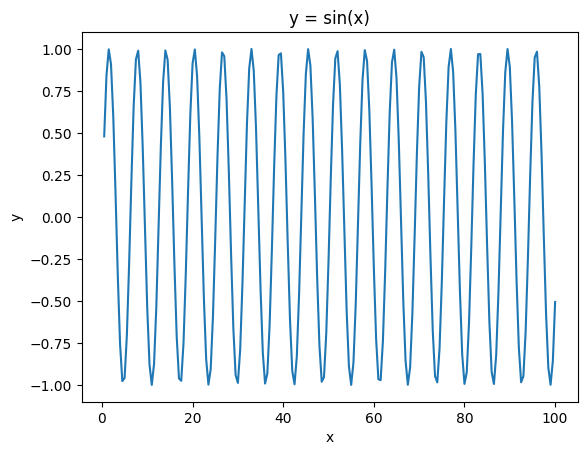

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Calculate y values as sin(x)
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')

# Show the plot
plt.show()


5) y = (sin(x))/x

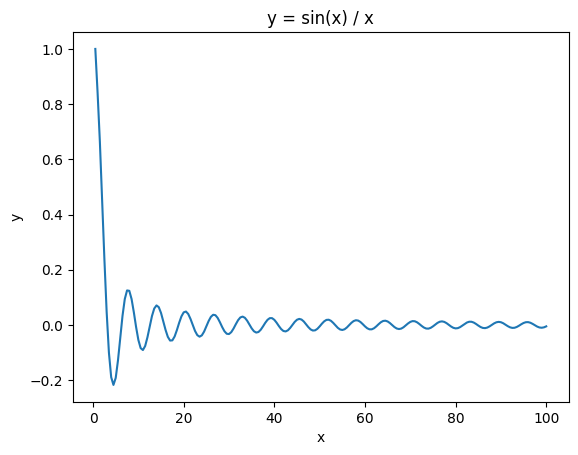

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Handle the division by zero at x=0 explicitly
y = np.sin(x) / x
y[0] = 1  # Limit of sin(x)/x as x approaches 0 is 1

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x) / x')

# Show the plot
plt.show()


6) y = log(x)

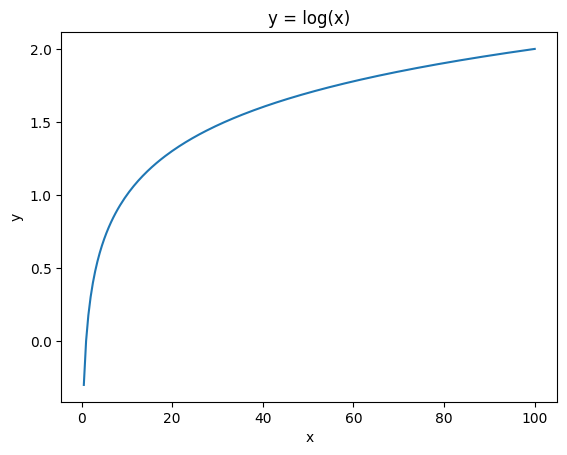

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Calculate y values as log(x) (base 10)
y = np.log10(x)

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = log(x)')

# Show the plot
plt.show()


7) y = e^x

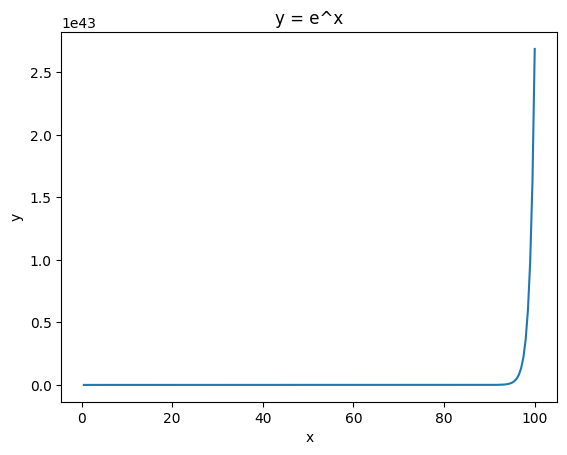

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.5 to 100 with a step of 0.5
x = np.arange(0.5, 100.1, 0.5)

# Calculate y values as e^x
y = np.exp(x)

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = e^x')

# Show the plot
plt.show()
